In [3]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#load dataset
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df = pd.read_csv(dataset_part_2_csv)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


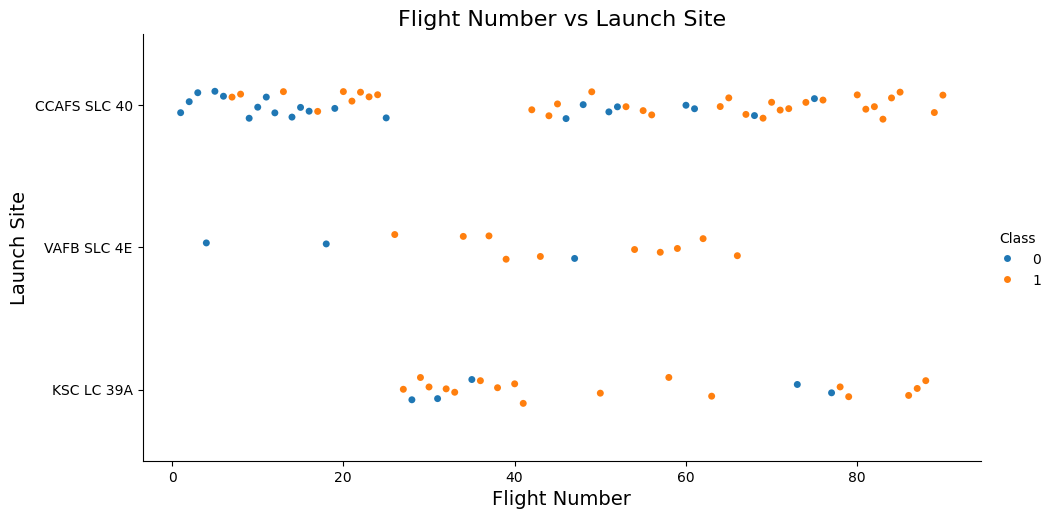

In [7]:
#flight # vs launch site
sns.catplot(data=df, x="FlightNumber", y="LaunchSite", hue="Class", aspect=2)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Flight Number vs Launch Site", fontsize=16)
plt.show()

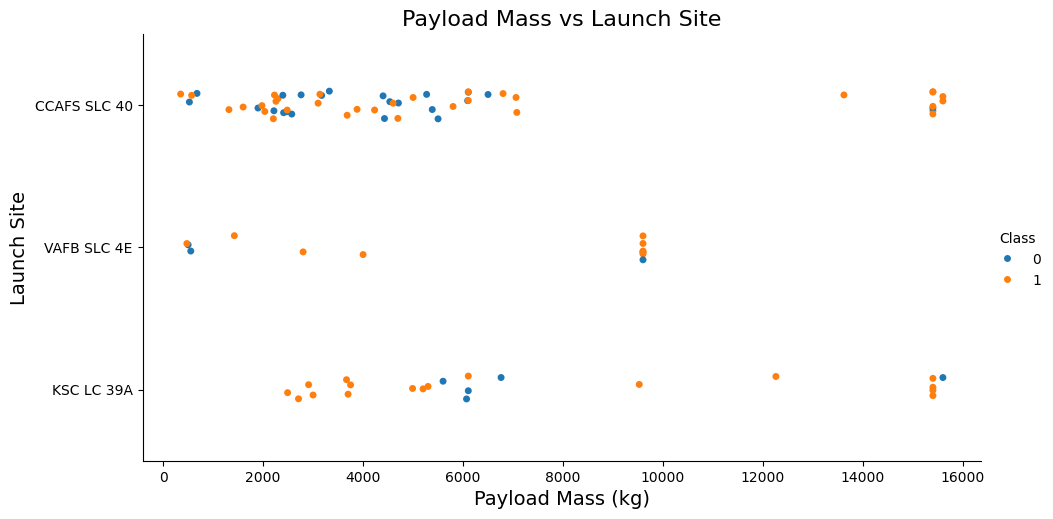

In [8]:
#payload vs launch site
sns.catplot(data=df, x="PayloadMass", y="LaunchSite", hue="Class", aspect=2)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Payload Mass vs Launch Site", fontsize=16)
plt.show()

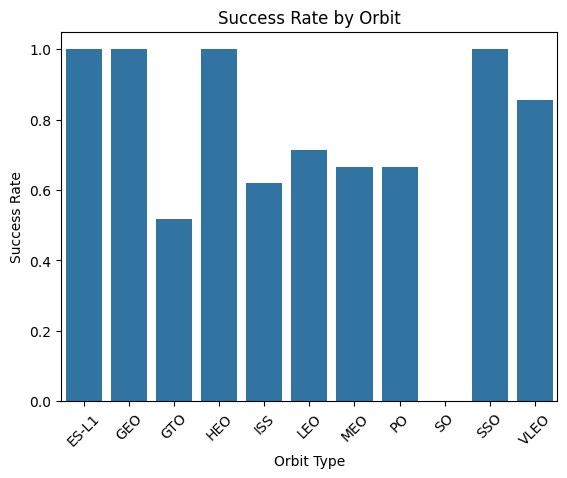

In [9]:
#success rate by orbit
success_rate = df.groupby("Orbit")["Class"].mean().reset_index()
sns.barplot(x="Orbit", y="Class", data=success_rate)
plt.xticks(rotation=45)
plt.xlabel("Orbit Type")
plt.ylabel("Success Rate")
plt.title("Success Rate by Orbit")
plt.show()

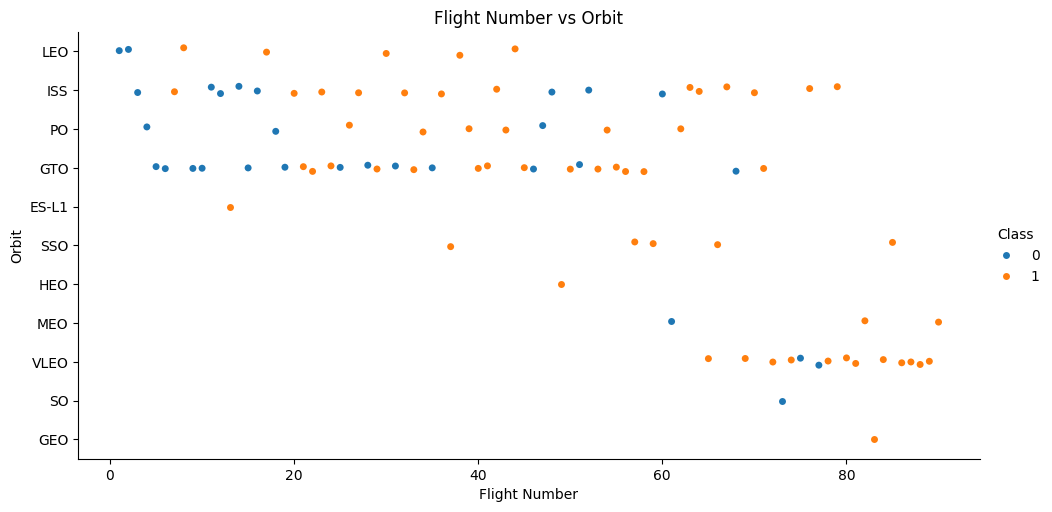

In [10]:
#fligh # vs orbit
sns.catplot(data=df, x="FlightNumber", y="Orbit", hue="Class", aspect=2)
plt.xlabel("Flight Number")
plt.ylabel("Orbit")
plt.title("Flight Number vs Orbit")
plt.show()

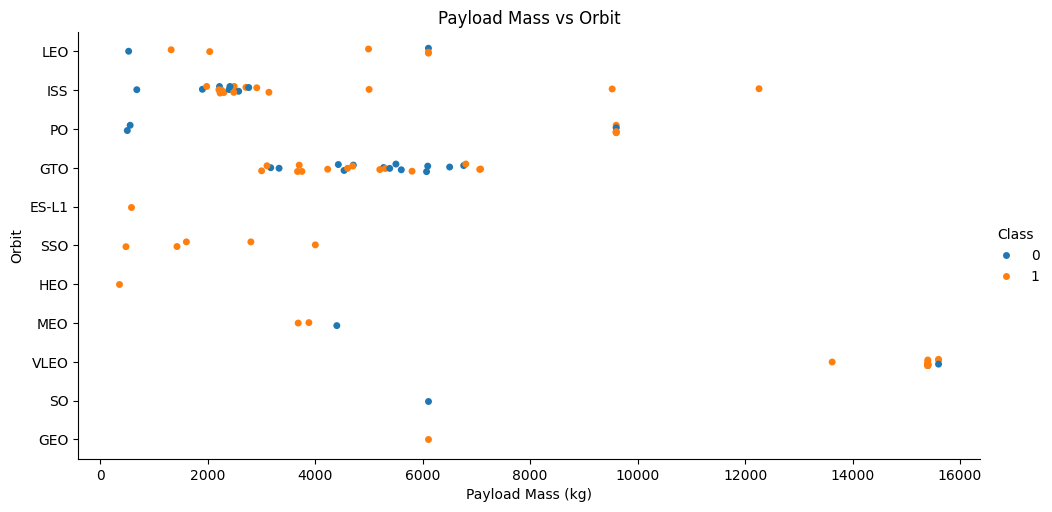

In [11]:
#payload vs orbit
sns.catplot(data=df, x="PayloadMass", y="Orbit", hue="Class", aspect=2)
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Orbit")
plt.title("Payload Mass vs Orbit")
plt.show()

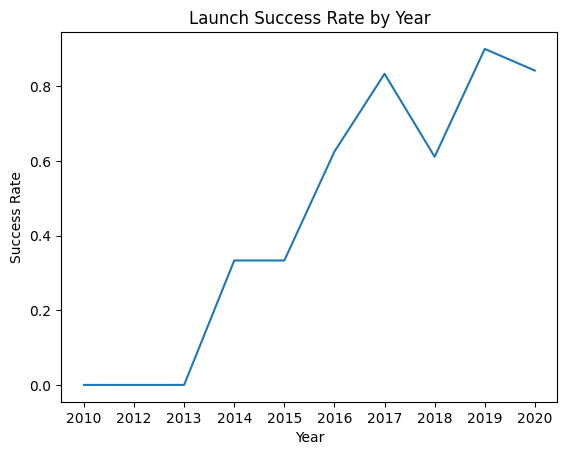

In [12]:
#launch success rate by year
year = [i.split("-")[0] for i in df["Date"]]
df['Year'] = year
yearly_success = df.groupby("Year")["Class"].mean().reset_index()
sns.lineplot(data=yearly_success, x="Year", y="Class")
plt.title("Launch Success Rate by Year")
plt.xlabel("Year")
plt.ylabel("Success Rate")
plt.show()

In [15]:
#dummy vars for categorical columns
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 
               'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 
               'Block', 'ReusedCount', 'Serial']]

features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
#cast to float64 and export
features_one_hot = features_one_hot.astype('float64')
features_one_hot.to_csv('dataset_part_3.csv', index=False)